<h1>After Cleaning and Feature Engineering: Modeling </h1>

- import data frames

In [126]:
import pandas as pd
import numpy as np

DATA_PATH ='./data'
df_fights = pd.read_csv(DATA_PATH+'/df_fights.csv')
df_fighter_history = pd.read_csv(DATA_PATH+'/df_fighter_history.csv')
df_fights_train = pd.read_csv(DATA_PATH+'/df_fights_train.csv')
df_fighter_history_train = pd.read_csv(DATA_PATH+'/df_fighter_history_train.csv')
df_train = pd.read_csv(DATA_PATH+'/df_train.csv')

<h4>Implement Random Forest Classifier on omniscient data (i.e. real fight stats are known prior to predicting a winner for the bout)</h4>

In [127]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# scaling not needed for tree model
X=df_train[['R_KD', 'B_KD', 'R_SIG_STR_pct',
       'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_PASS', 'B_PASS', 'R_REV', 'B_REV',
       'location', 'R_SIG_STR._ATT', 'R_SIG_STR._LANDED', 'B_SIG_STR._ATT',
       'B_SIG_STR._LANDED', 'R_TOTAL_STR._ATT', 'R_TOTAL_STR._LANDED',
       'B_TOTAL_STR._ATT', 'B_TOTAL_STR._LANDED', 'R_TD_ATT', 'R_TD_LANDED',
       'B_TD_ATT', 'B_TD_LANDED', 'R_HEAD_ATT', 'R_HEAD_LANDED', 'B_HEAD_ATT',
       'B_HEAD_LANDED', 'R_BODY_ATT', 'R_BODY_LANDED', 'B_BODY_ATT',
       'B_BODY_LANDED', 'R_LEG_ATT', 'R_LEG_LANDED', 'B_LEG_ATT',
       'B_LEG_LANDED', 'R_DISTANCE_ATT', 'R_DISTANCE_LANDED', 'B_DISTANCE_ATT',
       'B_DISTANCE_LANDED', 'R_CLINCH_ATT', 'R_CLINCH_LANDED', 'B_CLINCH_ATT',
       'B_CLINCH_LANDED', 'R_GROUND_ATT', 'R_GROUND_LANDED', 'B_GROUND_ATT',
       'B_GROUND_LANDED', 'title_bout',
       'total_time_fought(sec)', 'no_of_rounds', 'R_Height',
       'R_Weight', 'R_Reach', 'R_KO_win_%', 'R_Sub_win_%', 'R_Stance_Orthodox',
       'R_Stance_Southpaw', 'R_num_fights', 'R_record', 'R_age', 'B_Height',
       'B_Weight', 'B_Reach', 'B_KO_win_%', 'B_Sub_win_%', 'B_Stance_Orthodox',
       'B_Stance_Southpaw', 'B_num_fights', 'B_record', 'B_age', 'Bantamweight', 'Featherweight',
       'Flyweight', 'Heavyweight', 'Light Heavyweight', 'Lightweight',
       'Middleweight', 'Welterweight', 'Women\'s Bantamweight',
       'Women\'s Featherweight', 'Women\'s Flyweight', 'Women\'s Strawweight']]  # Features

y=df_train['Red_win']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) # 80% training and 20% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [128]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Receiver Operating Characteristic Area-Under-Curve (0->1, where 1 is a perfect classifier))
print("AUC:", metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.8593508500772797
AUC: 0.8324592074592075


- Plot Receiver Operating Characteristic

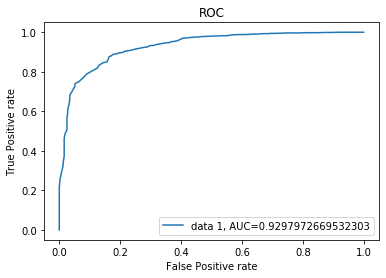

In [129]:
import matplotlib.pyplot as plt
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC')
plt.show()

In [130]:
feature_importance = pd.Series(clf.feature_importances_,index=['R_KD', 'B_KD', 'R_SIG_STR_pct',
       'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_PASS', 'B_PASS', 'R_REV', 'B_REV',
       'location', 'R_SIG_STR._ATT', 'R_SIG_STR._LANDED', 'B_SIG_STR._ATT',
       'B_SIG_STR._LANDED', 'R_TOTAL_STR._ATT', 'R_TOTAL_STR._LANDED',
       'B_TOTAL_STR._ATT', 'B_TOTAL_STR._LANDED', 'R_TD_ATT', 'R_TD_LANDED',
       'B_TD_ATT', 'B_TD_LANDED', 'R_HEAD_ATT', 'R_HEAD_LANDED', 'B_HEAD_ATT',
       'B_HEAD_LANDED', 'R_BODY_ATT', 'R_BODY_LANDED', 'B_BODY_ATT',
       'B_BODY_LANDED', 'R_LEG_ATT', 'R_LEG_LANDED', 'B_LEG_ATT',
       'B_LEG_LANDED', 'R_DISTANCE_ATT', 'R_DISTANCE_LANDED', 'B_DISTANCE_ATT',
       'B_DISTANCE_LANDED', 'R_CLINCH_ATT', 'R_CLINCH_LANDED', 'B_CLINCH_ATT',
       'B_CLINCH_LANDED', 'R_GROUND_ATT', 'R_GROUND_LANDED', 'B_GROUND_ATT',
       'B_GROUND_LANDED', 'title_bout',
       'total_time_fought(sec)', 'no_of_rounds', 'R_Height',
       'R_Weight', 'R_Reach', 'R_KO_win_%', 'R_Sub_win_%', 'R_Stance_Orthodox',
       'R_Stance_Southpaw', 'R_num_fights', 'R_record', 'R_age', 'B_Height',
       'B_Weight', 'B_Reach', 'B_KO_win_%', 'B_Sub_win_%', 'B_Stance_Orthodox',
       'B_Stance_Southpaw', 'B_num_fights', 'B_record', 'B_age', 'Bantamweight', 'Featherweight',
       'Flyweight', 'Heavyweight', 'Light Heavyweight', 'Lightweight',
       'Middleweight', 'Welterweight', 'Women\'s Bantamweight',
       'Women\'s Featherweight', 'Women\'s Flyweight', 'Women\'s Strawweight']).sort_values(ascending=False)

In [131]:
feature_importance[feature_importance > 0.01]

R_GROUND_LANDED           0.051654
B_KD                      0.050496
B_GROUND_LANDED           0.041253
B_HEAD_LANDED             0.039811
R_GROUND_ATT              0.037705
B_GROUND_ATT              0.035766
R_TOTAL_STR._LANDED       0.030849
B_SIG_STR._LANDED         0.029081
R_HEAD_LANDED             0.028063
B_SIG_STR_pct             0.027691
R_SIG_STR._LANDED         0.026226
R_KD                      0.025720
B_TOTAL_STR._LANDED       0.024315
R_SUB_ATT                 0.023765
R_TOTAL_STR._ATT          0.019606
B_TOTAL_STR._ATT          0.019447
B_PASS                    0.018236
R_SIG_STR_pct             0.017519
B_DISTANCE_LANDED         0.017132
R_PASS                    0.016641
R_SIG_STR._ATT            0.015987
R_age                     0.015758
B_SIG_STR._ATT            0.015731
B_HEAD_ATT                0.014931
R_HEAD_ATT                0.014802
R_TD_pct                  0.013194
R_DISTANCE_LANDED         0.012091
R_DISTANCE_ATT            0.011656
R_CLINCH_ATT        

<h4>Implement Random Forest Classifier only using features that WOULD BE KNOWN before a fight begins</h4>

In [132]:
X=df_train[['location','title_bout','R_Height',
       'R_Weight', 'R_Reach', 'R_KO_win_%', 'R_Sub_win_%', 'R_Stance_Orthodox',
       'R_Stance_Southpaw', 'R_num_fights', 'R_record', 'R_age', 'B_Height',
       'B_Weight', 'B_Reach', 'B_KO_win_%', 'B_Sub_win_%', 'B_Stance_Orthodox',
       'B_Stance_Southpaw', 'B_num_fights', 'B_record', 'B_age', 'Bantamweight', 'Featherweight',
       'Flyweight', 'Heavyweight', 'Light Heavyweight', 'Lightweight',
       'Middleweight', 'Welterweight', 'Women\'s Bantamweight',
       'Women\'s Featherweight', 'Women\'s Flyweight', 'Women\'s Strawweight']]  # Features

y=df_train['Red_win']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6619897959183674


In [133]:
feature_importance = pd.Series(clf.feature_importances_,index=['location','title_bout','R_Height',
       'R_Weight', 'R_Reach', 'R_KO_win_%', 'R_Sub_win_%', 'R_Stance_Orthodox',
       'R_Stance_Southpaw', 'R_num_fights', 'R_record', 'R_age', 'B_Height',
       'B_Weight', 'B_Reach', 'B_KO_win_%', 'B_Sub_win_%', 'B_Stance_Orthodox',
       'B_Stance_Southpaw', 'B_num_fights', 'B_record', 'B_age', 'Bantamweight', 'Featherweight',
       'Flyweight', 'Heavyweight', 'Light Heavyweight', 'Lightweight',
       'Middleweight', 'Welterweight', 'Women\'s Bantamweight',
       'Women\'s Featherweight', 'Women\'s Flyweight', 'Women\'s Strawweight']).sort_values(ascending=False)

feature_importance[feature_importance > 0.01]

R_age                0.102283
B_age                0.091648
R_record             0.060485
R_num_fights         0.060345
B_Reach              0.059142
R_KO_win_%           0.056124
R_Reach              0.054431
B_num_fights         0.052662
B_record             0.052471
R_Sub_win_%          0.051756
B_Height             0.048476
B_KO_win_%           0.047861
R_Height             0.047302
B_Sub_win_%          0.042651
B_Weight             0.032584
R_Weight             0.032561
location             0.011544
B_Stance_Orthodox    0.010621
R_Stance_Orthodox    0.010137
dtype: float64

- Displaying top feature importance when the current fight stats are not available   

No handles with labels found to put in legend.


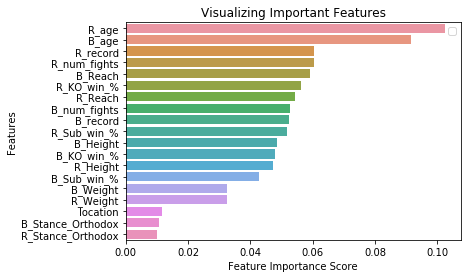

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
feature_importance_plt = feature_importance[feature_importance > 0.01]
sns.barplot(x=feature_importance_plt, y=feature_importance_plt.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Create df_fights_train and df_fighter_history_train dataframes with estimated stats
- will be pulling much more from df_fighter_history when calculating the estimates data frame
- creating data frame of estimated fighter stats
    - avg. from all fights
    - avg. from last 5 fights
    - values from last fight

In [135]:
df_fights_train_est = df_fights[['R_fighter', 'B_fighter','win_by', 'last_round', 'date',
       'location','title_bout', 'weight_class', 
       'Red_win']]

#10 fight look-back appears to have the highest F1 and AUC scores

past_fights_to_average = 10


df_fighter_history_train_est = df_fighter_history[['fighter_name', 'Height', 
                            'Weight', 'Reach', 'Stance', 'DOB', 'win_by',
                            'date','win',
       'KD','SIG_STR_pct', 'TD_pct', 'SUB_ATT', 'PASS', 'REV', 'SIG_STR._ATT',
       'SIG_STR._LANDED', 'TOTAL_STR._ATT', 'TOTAL_STR._LANDED', 'TD_ATT',
       'TD_LANDED', 'HEAD_ATT', 'HEAD_LANDED', 'BODY_ATT', 'BODY_LANDED',
       'LEG_ATT', 'LEG_LANDED', 'DISTANCE_ATT', 'DISTANCE_LANDED',
       'CLINCH_ATT', 'CLINCH_LANDED', 'GROUND_ATT', 'GROUND_LANDED',
       'total_time_fought(sec)', 'no_of_rounds']]


# first merge for red fighter estimates
df_train_est = pd.merge(df_fights_train_est, df_fighter_history_train_est, left_on='R_fighter',right_on='fighter_name',sort=False)


df_train_est = df_train_est[df_train_est['date_x'] > df_train_est['date_y']]


df_train_est = pd.concat([df_train_est, pd.get_dummies(df_train_est['win_by_y'])], axis=1)
df_train_est.drop(columns=['win_by_y','Other'], inplace=True)
df_train_est.rename(columns={'date_x':'date', 'KO':'KO_win_%', 'Submission':'Sub_win_%'}, inplace=True)


df_train_est = pd.concat([df_train_est, pd.get_dummies(df_train_est['Stance'])], axis=1)
df_train_est.drop(columns=['Stance','Switch','Open Stance','Sideways'], inplace=True)
df_train_est.rename(columns={'Orthodox':'R_Stance_Orthodox', 
                         'Southpaw':'R_Stance_Southpaw',
                         'Height':'R_Height',
                         'Weight':'R_Weight',
                         'Reach':'R_Reach'}, inplace=True)


df_train_est['date_y']= pd.to_datetime(df_train_est['date_y'])
df_train_est['date']= pd.to_datetime(df_train_est['date']) 
df_train_est['DOB']= pd.to_datetime(df_train_est['DOB']) 


df_train_est['R_num_fights'] = df_train_est.groupby(['R_fighter','date'])['date'].transform('count')

df_train_est['R_num_wins'] = df_train_est.groupby(['R_fighter','date'])['win'].transform('sum')

df_train_est['R_record'] = df_train_est['R_num_wins']/df_train_est['R_num_fights']

df_train_est['fight_rank'] = df_train_est.groupby(['R_fighter','date'])['date_y'].rank(ascending=False, method='first')

df_train_est = df_train_est[df_train_est['fight_rank']<=past_fights_to_average]

df_train_est.drop(columns=['win','R_num_wins','date_y','fighter_name','fight_rank'], inplace=True)


df_train_est['R_age'] = df_train_est['date'] - df_train_est['DOB']
df_train_est['R_age'] = df_train_est['R_age']/np.timedelta64(1,'Y')
df_train_est['R_age'].fillna(df_train_est['R_age'].mean(), inplace=True)

df_train_est.drop(columns=['DOB'], inplace=True)


est_columns = ['KD', 'SIG_STR_pct', 'TD_pct', 'SUB_ATT', 'PASS', 'REV',
       'SIG_STR._ATT', 'SIG_STR._LANDED', 'TOTAL_STR._ATT',
       'TOTAL_STR._LANDED', 'TD_ATT', 'TD_LANDED', 'HEAD_ATT', 'HEAD_LANDED',
       'BODY_ATT', 'BODY_LANDED', 'LEG_ATT', 'LEG_LANDED', 'DISTANCE_ATT',
       'DISTANCE_LANDED', 'CLINCH_ATT', 'CLINCH_LANDED', 'GROUND_ATT',
       'GROUND_LANDED', 'total_time_fought(sec)', 'no_of_rounds', 'KO_win_%',
       'Sub_win_%']


df_train_est[est_columns] = df_train_est.groupby(['R_fighter', 'B_fighter', 'win_by_x', 'last_round', 'date', 'location',
       'title_bout', 'weight_class', 'Red_win', 'R_Height', 'R_Weight',
       'R_Reach', 'R_Stance_Orthodox', 'R_Stance_Southpaw', 'R_num_fights',
       'R_record', 'R_age'])[est_columns].transform('mean')

df_train_est = df_train_est.drop_duplicates()

df_train_est.rename(columns={'KD':'R_KD',                        
                             'SIG_STR_pct':'R_SIG_STR_pct',
                             'TD_pct':'R_TD_pct',
                             'SUB_ATT':'R_SUB_ATT',
                             'PASS':'R_PASS',
                             'REV':'R_REV',
                           'SIG_STR._ATT':'R_SIG_STR._ATT',
                             'SIG_STR._LANDED':'R_SIG_STR._LANDED',
                             'TOTAL_STR._ATT':'R_TOTAL_STR._ATT',
                           'TOTAL_STR._LANDED':'R_TOTAL_STR._LANDED',
                             'TD_ATT':'R_TD_ATT',
                             'TD_LANDED':'R_TD_LANDED',
                             'HEAD_ATT':'R_HEAD_ATT',
                             'HEAD_LANDED':'R_HEAD_LANDED',
                           'BODY_ATT':'R_BODY_ATT',
                             'BODY_LANDED':'R_BODY_LANDED',
                             'LEG_ATT':'R_LEG_ATT',
                             'LEG_LANDED':'R_LEG_LANDED',
                             'DISTANCE_ATT':'R_DISTANCE_ATT',
                           'DISTANCE_LANDED':'R_DISTANCE_LANDED',
                             'CLINCH_ATT':'R_CLINCH_ATT',
                             'CLINCH_LANDED':'R_CLINCH_LANDED', 
                             'GROUND_ATT':'R_GROUND_ATT',
                           'GROUND_LANDED':'R_GROUND_LANDED',
                             'total_time_fought(sec)':'R_total_time_fought(sec)',
                             'no_of_rounds':'R_no_of_rounds',
                             'KO_win_%':'R_KO_win_%',
                           'Sub_win_%':'R_Sub_win_%'}, inplace=True)


# repeat steps for blue fighter
df_train_est = pd.merge(df_train_est, df_fighter_history_train_est, left_on='B_fighter',right_on='fighter_name',sort=False)

df_train_est['date_y']= pd.to_datetime(df_train_est['date_y'])
df_train_est['date_x']= pd.to_datetime(df_train_est['date_x']) 
df_train_est['DOB']= pd.to_datetime(df_train_est['DOB']) 

df_train_est = df_train_est[df_train_est['date_x'] > df_train_est['date_y']]


df_train_est = pd.concat([df_train_est, pd.get_dummies(df_train_est['win_by'])], axis=1)
#df_train_est.drop(columns=['win_by','Other'], inplace=True)

cols=['win_by','Other']
for c in cols:
    try:
        df_train_est.drop(columns=c, inplace=True)
    except:
        pass

df_train_est.rename(columns={'date_x':'date', 'KO':'KO_win_%', 'Submission':'Sub_win_%'}, inplace=True)

df_train_est = pd.concat([df_train_est, pd.get_dummies(df_train_est['Stance'])], axis=1)

#df_train_est.drop(columns=['Stance','Switch','Open Stance','Sideways'], inplace=True)

cols=['Stance','Switch','Open Stance','Sideways']
for c in cols:
    try:
        df_train_est.drop(columns=c, inplace=True)
    except:
        pass

df_train_est.rename(columns={'Orthodox':'B_Stance_Orthodox', 
                         'Southpaw':'B_Stance_Southpaw',
                         'Height':'B_Height',
                         'Weight':'B_Weight',
                         'Reach':'B_Reach'}, inplace=True)


df_train_est['B_num_fights'] = df_train_est.groupby(['B_fighter','date'])['date'].transform('count')

df_train_est['B_num_wins'] = df_train_est.groupby(['B_fighter','date'])['win'].transform('sum')

df_train_est['B_record'] = df_train_est['B_num_wins']/df_train_est['B_num_fights']

df_train_est['fight_rank'] = df_train_est.groupby(['B_fighter','date'])['date_y'].rank(ascending=False, method='first')

df_train_est = df_train_est[df_train_est['fight_rank']<=past_fights_to_average]

df_train_est.drop(columns=['win','B_num_wins','date_y','fighter_name','fight_rank'], inplace=True)


df_train_est['B_age'] = df_train_est['date'] - df_train_est['DOB']
df_train_est['B_age'] = df_train_est['B_age']/np.timedelta64(1,'Y')
df_train_est['B_age'].fillna(df_train_est['B_age'].mean(), inplace=True)

df_train_est.drop(columns=['DOB'], inplace=True)


est_columns = ['KD', 'SIG_STR_pct', 'TD_pct', 'SUB_ATT', 'PASS', 'REV',
       'SIG_STR._ATT', 'SIG_STR._LANDED', 'TOTAL_STR._ATT',
       'TOTAL_STR._LANDED', 'TD_ATT', 'TD_LANDED', 'HEAD_ATT', 'HEAD_LANDED',
       'BODY_ATT', 'BODY_LANDED', 'LEG_ATT', 'LEG_LANDED', 'DISTANCE_ATT',
       'DISTANCE_LANDED', 'CLINCH_ATT', 'CLINCH_LANDED', 'GROUND_ATT',
       'GROUND_LANDED', 'total_time_fought(sec)', 'no_of_rounds', 'KO_win_%',
       'Sub_win_%']



df_train_est[est_columns] = df_train_est.groupby(['R_fighter', 'B_fighter', 'win_by_x', 'last_round', 'date', 'location',
       'title_bout', 'weight_class', 'Red_win', 'B_Height', 'B_Weight',
       'B_Reach', 'B_Stance_Orthodox', 'B_Stance_Southpaw', 'B_num_fights',
       'B_record', 'B_age'])[est_columns].transform('mean')

df_train_est = df_train_est.drop_duplicates()

df_train_est.rename(columns={'KD':'B_KD',                        
                             'SIG_STR_pct':'B_SIG_STR_pct',
                             'TD_pct':'B_TD_pct',
                             'SUB_ATT':'B_SUB_ATT',
                             'PASS':'B_PASS',
                             'REV':'B_REV',
                           'SIG_STR._ATT':'B_SIG_STR._ATT',
                             'SIG_STR._LANDED':'B_SIG_STR._LANDED',
                             'TOTAL_STR._ATT':'B_TOTAL_STR._ATT',
                           'TOTAL_STR._LANDED':'B_TOTAL_STR._LANDED',
                             'TD_ATT':'B_TD_ATT',
                             'TD_LANDED':'B_TD_LANDED',
                             'HEAD_ATT':'B_HEAD_ATT',
                             'HEAD_LANDED':'B_HEAD_LANDED',
                           'BODY_ATT':'B_BODY_ATT',
                             'BODY_LANDED':'B_BODY_LANDED',
                             'LEG_ATT':'B_LEG_ATT',
                             'LEG_LANDED':'B_LEG_LANDED',
                             'DISTANCE_ATT':'B_DISTANCE_ATT',
                           'DISTANCE_LANDED':'B_DISTANCE_LANDED',
                             'CLINCH_ATT':'B_CLINCH_ATT',
                             'CLINCH_LANDED':'B_CLINCH_LANDED', 
                             'GROUND_ATT':'B_GROUND_ATT',
                           'GROUND_LANDED':'B_GROUND_LANDED',
                             'total_time_fought(sec)':'B_total_time_fought(sec)',
                             'no_of_rounds':'B_no_of_rounds',
                             'KO_win_%':'B_KO_win_%',
                           'Sub_win_%':'B_Sub_win_%'}, inplace=True)


df_train_est = pd.concat([df_train_est, pd.get_dummies(df_train_est['weight_class'])], axis=1)
df_train_est.drop(columns=['weight_class','Open Weight','Catch Weight'], inplace=True)
df_train_est.drop(columns=['win_by_x','last_round'], inplace=True)

- find optimal hyperparameters for classifier
    - don't run Grid Search again; it takes ~30 min

In [136]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyper_opt = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(clf, hyper_opt, cv = 3, verbose = 1, 
                      n_jobs = -1)

#bestF = gridF.fit(X_train, y_train)

#bestF

- Optimal Random Forest Classifier (after hyperparamter tuning)

In [137]:
forestOpt = RandomForestClassifier(bootstrap=True,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              #max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False)

X=df_train_est[['location', 'title_bout',
       'R_Height', 'R_Weight', 'R_Reach', 'R_KD', 'R_SIG_STR_pct', 'R_TD_pct',
       'R_SUB_ATT', 'R_PASS', 'R_REV', 'R_SIG_STR._ATT', 'R_SIG_STR._LANDED',
       'R_TOTAL_STR._ATT', 'R_TOTAL_STR._LANDED', 'R_TD_ATT', 'R_TD_LANDED',
       'R_HEAD_ATT', 'R_HEAD_LANDED', 'R_BODY_ATT', 'R_BODY_LANDED',
       'R_LEG_ATT', 'R_LEG_LANDED', 'R_DISTANCE_ATT', 'R_DISTANCE_LANDED',
       'R_CLINCH_ATT', 'R_CLINCH_LANDED', 'R_GROUND_ATT', 'R_GROUND_LANDED',
       'R_total_time_fought(sec)', 'R_no_of_rounds', 'R_KO_win_%',
       'R_Sub_win_%', 'R_Stance_Orthodox', 'R_Stance_Southpaw', 'R_num_fights',
       'R_record', 'R_age', 'B_Height', 'B_Weight', 'B_Reach', 'B_KD',
       'B_SIG_STR_pct', 'B_TD_pct', 'B_SUB_ATT', 'B_PASS', 'B_REV',
       'B_SIG_STR._ATT', 'B_SIG_STR._LANDED', 'B_TOTAL_STR._ATT',
       'B_TOTAL_STR._LANDED', 'B_TD_ATT', 'B_TD_LANDED', 'B_HEAD_ATT',
       'B_HEAD_LANDED', 'B_BODY_ATT', 'B_BODY_LANDED', 'B_LEG_ATT',
       'B_LEG_LANDED', 'B_DISTANCE_ATT', 'B_DISTANCE_LANDED', 'B_CLINCH_ATT',
       'B_CLINCH_LANDED', 'B_GROUND_ATT', 'B_GROUND_LANDED',
       'B_total_time_fought(sec)', 'B_no_of_rounds', 'B_KO_win_%',
       'B_Sub_win_%', 'B_Stance_Orthodox', 'B_Stance_Southpaw', 'B_num_fights',
       'B_record', 'B_age', 'Bantamweight', 'Featherweight', 'Flyweight',
       'Heavyweight', 'Light Heavyweight', 'Lightweight', 'Middleweight',
       'Welterweight', 'Women\'s Bantamweight', 'Women\'s Featherweight',
       'Women\'s Flyweight', 'Women\'s Strawweight']]  # Features

y=df_train_est['Red_win']  # Labels
                        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test
    
modelOpt = forestOpt.fit(X_train, y_train)
y_pred = modelOpt.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))  #when we pred a winner, how often were we right? (.66)
print("Precision:",metrics.precision_score(y_test, y_pred)) #what % of our winner preds were right (.69)
print("Recall:",metrics.recall_score(y_test, y_pred)) #what % of winners did we detect (.88)
print("F1:",metrics.f1_score(y_test, y_pred)) #harmonic mean of precision and recall (.78)
print("AUC:", metrics.roc_auc_score(y_test, y_pred)) #area under ROC curve (.57)

Accuracy: 0.6594387755102041
Precision: 0.6783625730994152
Recall: 0.9080234833659491
F1: 0.7765690376569038
AUC: 0.5510813387525716


- Receiver Operating Characteristic

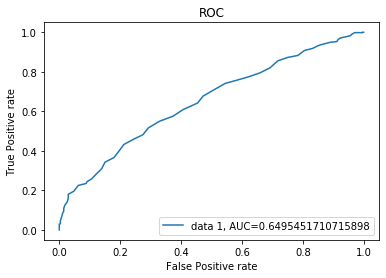

In [138]:
y_pred_proba = modelOpt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC')
plt.show()

In [139]:
feature_importance = pd.Series(modelOpt.feature_importances_,index=['location', 'title_bout',
       'R_Height', 'R_Weight', 'R_Reach', 'R_KD', 'R_SIG_STR_pct', 'R_TD_pct',
       'R_SUB_ATT', 'R_PASS', 'R_REV', 'R_SIG_STR._ATT', 'R_SIG_STR._LANDED',
       'R_TOTAL_STR._ATT', 'R_TOTAL_STR._LANDED', 'R_TD_ATT', 'R_TD_LANDED',
       'R_HEAD_ATT', 'R_HEAD_LANDED', 'R_BODY_ATT', 'R_BODY_LANDED',
       'R_LEG_ATT', 'R_LEG_LANDED', 'R_DISTANCE_ATT', 'R_DISTANCE_LANDED',
       'R_CLINCH_ATT', 'R_CLINCH_LANDED', 'R_GROUND_ATT', 'R_GROUND_LANDED',
       'R_total_time_fought(sec)', 'R_no_of_rounds', 'R_KO_win_%',
       'R_Sub_win_%', 'R_Stance_Orthodox', 'R_Stance_Southpaw', 'R_num_fights',
       'R_record', 'R_age', 'B_Height', 'B_Weight', 'B_Reach', 'B_KD',
       'B_SIG_STR_pct', 'B_TD_pct', 'B_SUB_ATT', 'B_PASS', 'B_REV',
       'B_SIG_STR._ATT', 'B_SIG_STR._LANDED', 'B_TOTAL_STR._ATT',
       'B_TOTAL_STR._LANDED', 'B_TD_ATT', 'B_TD_LANDED', 'B_HEAD_ATT',
       'B_HEAD_LANDED', 'B_BODY_ATT', 'B_BODY_LANDED', 'B_LEG_ATT',
       'B_LEG_LANDED', 'B_DISTANCE_ATT', 'B_DISTANCE_LANDED', 'B_CLINCH_ATT',
       'B_CLINCH_LANDED', 'B_GROUND_ATT', 'B_GROUND_LANDED',
       'B_total_time_fought(sec)', 'B_no_of_rounds', 'B_KO_win_%',
       'B_Sub_win_%', 'B_Stance_Orthodox', 'B_Stance_Southpaw', 'B_num_fights',
       'B_record', 'B_age', 'Bantamweight', 'Featherweight', 'Flyweight',
       'Heavyweight', 'Light Heavyweight', 'Lightweight', 'Middleweight',
       'Welterweight', 'Women\'s Bantamweight', 'Women\'s Featherweight',
       'Women\'s Flyweight', 'Women\'s Strawweight']).sort_values(ascending=False)

feature_importance[feature_importance > 0.016]

R_age                       0.031700
B_age                       0.023261
B_HEAD_LANDED               0.019419
R_BODY_ATT                  0.019022
R_TD_pct                    0.018770
B_DISTANCE_LANDED           0.018649
R_total_time_fought(sec)    0.018569
R_DISTANCE_ATT              0.018487
B_SIG_STR._LANDED           0.018348
B_SIG_STR._ATT              0.018282
R_TOTAL_STR._LANDED         0.017720
B_DISTANCE_ATT              0.017647
R_SIG_STR_pct               0.017594
B_SIG_STR_pct               0.017553
R_BODY_LANDED               0.017438
B_BODY_ATT                  0.017300
R_GROUND_LANDED             0.017240
R_LEG_ATT                   0.017229
B_TOTAL_STR._LANDED         0.017219
R_GROUND_ATT                0.016909
B_HEAD_ATT                  0.016759
B_TD_ATT                    0.016621
B_TOTAL_STR._ATT            0.016381
B_BODY_LANDED               0.016380
R_TOTAL_STR._ATT            0.016337
R_SIG_STR._ATT              0.016034
dtype: float64

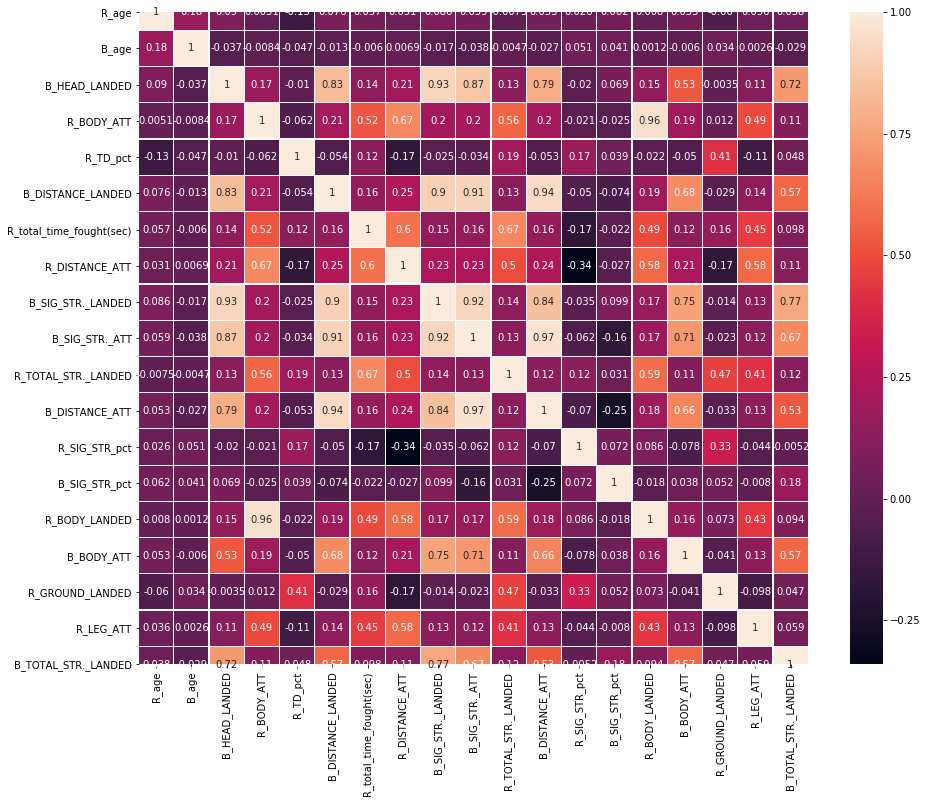

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_hist = df_train_est[['location', 'title_bout',
       'R_Height', 'R_Weight', 'R_Reach', 'R_KD', 'R_SIG_STR_pct', 'R_TD_pct',
       'R_SUB_ATT', 'R_PASS', 'R_REV', 'R_SIG_STR._ATT', 'R_SIG_STR._LANDED',
       'R_TOTAL_STR._ATT', 'R_TOTAL_STR._LANDED', 'R_TD_ATT', 'R_TD_LANDED',
       'R_HEAD_ATT', 'R_HEAD_LANDED', 'R_BODY_ATT', 'R_BODY_LANDED',
       'R_LEG_ATT', 'R_LEG_LANDED', 'R_DISTANCE_ATT', 'R_DISTANCE_LANDED',
       'R_CLINCH_ATT', 'R_CLINCH_LANDED', 'R_GROUND_ATT', 'R_GROUND_LANDED',
       'R_total_time_fought(sec)', 'R_no_of_rounds', 'R_KO_win_%',
       'R_Sub_win_%', 'R_Stance_Orthodox', 'R_Stance_Southpaw', 'R_num_fights',
       'R_record', 'R_age', 'B_Height', 'B_Weight', 'B_Reach', 'B_KD',
       'B_SIG_STR_pct', 'B_TD_pct', 'B_SUB_ATT', 'B_PASS', 'B_REV',
       'B_SIG_STR._ATT', 'B_SIG_STR._LANDED', 'B_TOTAL_STR._ATT',
       'B_TOTAL_STR._LANDED', 'B_TD_ATT', 'B_TD_LANDED', 'B_HEAD_ATT',
       'B_HEAD_LANDED', 'B_BODY_ATT', 'B_BODY_LANDED', 'B_LEG_ATT',
       'B_LEG_LANDED', 'B_DISTANCE_ATT', 'B_DISTANCE_LANDED', 'B_CLINCH_ATT',
       'B_CLINCH_LANDED', 'B_GROUND_ATT', 'B_GROUND_LANDED',
       'B_total_time_fought(sec)', 'B_no_of_rounds', 'B_KO_win_%',
       'B_Sub_win_%', 'B_Stance_Orthodox', 'B_Stance_Southpaw', 'B_num_fights',
       'B_record', 'B_age', 'Bantamweight', 'Featherweight', 'Flyweight',
       'Heavyweight', 'Light Heavyweight', 'Lightweight', 'Middleweight',
       'Welterweight', 'Women\'s Bantamweight', 'Women\'s Featherweight',
       'Women\'s Flyweight', 'Women\'s Strawweight']]

fig, ax = plt.subplots(figsize=(15,12))         # Sample figsize in inches
corrMatrix = df_hist[feature_importance[feature_importance > 0.017].index].corr()
sns.heatmap(corrMatrix, annot=True, linewidths=.2, ax=ax)

<h4>Implement Support Vector Machine Classifier (MAIN MODEL)</h4>

In [141]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

X=df_train_est[['location', 'title_bout',
       'R_Height', 'R_Weight', 'R_Reach', 'R_KD', 'R_SIG_STR_pct', 'R_TD_pct',
       'R_SUB_ATT', 'R_PASS', 'R_REV', 'R_SIG_STR._ATT', 'R_SIG_STR._LANDED',
       'R_TOTAL_STR._ATT', 'R_TOTAL_STR._LANDED', 'R_TD_ATT', 'R_TD_LANDED',
       'R_HEAD_ATT', 'R_HEAD_LANDED', 'R_BODY_ATT', 'R_BODY_LANDED',
       'R_LEG_ATT', 'R_LEG_LANDED', 'R_DISTANCE_ATT', 'R_DISTANCE_LANDED',
       'R_CLINCH_ATT', 'R_CLINCH_LANDED', 'R_GROUND_ATT', 'R_GROUND_LANDED',
       'R_total_time_fought(sec)', 'R_no_of_rounds', 'R_KO_win_%',
       'R_Sub_win_%', 'R_Stance_Orthodox', 'R_Stance_Southpaw', 'R_num_fights',
       'R_record', 'R_age', 'B_Height', 'B_Weight', 'B_Reach', 'B_KD',
       'B_SIG_STR_pct', 'B_TD_pct', 'B_SUB_ATT', 'B_PASS', 'B_REV',
       'B_SIG_STR._ATT', 'B_SIG_STR._LANDED', 'B_TOTAL_STR._ATT',
       'B_TOTAL_STR._LANDED', 'B_TD_ATT', 'B_TD_LANDED', 'B_HEAD_ATT',
       'B_HEAD_LANDED', 'B_BODY_ATT', 'B_BODY_LANDED', 'B_LEG_ATT',
       'B_LEG_LANDED', 'B_DISTANCE_ATT', 'B_DISTANCE_LANDED', 'B_CLINCH_ATT',
       'B_CLINCH_LANDED', 'B_GROUND_ATT', 'B_GROUND_LANDED',
       'B_total_time_fought(sec)', 'B_no_of_rounds', 'B_KO_win_%',
       'B_Sub_win_%', 'B_Stance_Orthodox', 'B_Stance_Southpaw', 'B_num_fights',
       'B_record', 'B_age', 'Bantamweight', 'Featherweight', 'Flyweight',
       'Heavyweight', 'Light Heavyweight', 'Lightweight', 'Middleweight',
       'Welterweight', 'Women\'s Bantamweight', 'Women\'s Featherweight',
       'Women\'s Flyweight', 'Women\'s Strawweight']]  # Features

y=df_train_est['Red_win']  # Labels

#need the sigmoid function (sigmodi = 1 / (1 + exp(-y)), where y is the distance between the sample and the boundary "plus" the bias (y = xW + b))
# Platt scaling

#tested the basic kernel types for performance (e.g., polynomial, radial basis function (RBF), sigmoid, linear)
#tuned parameters with k-fold cross validation

#rbf --> {'C': 0.001, 'gamma': 0.001}
clf = make_pipeline(StandardScaler(), SVC(kernel ='rbf', gamma = 'auto', probability=True))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

clf.fit(X_train, y_train) 

predicted_classes = clf.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, predicted_classes))  #when we pred a winner, how often were we right? (.67)
print("Precision:",metrics.precision_score(y_test, predicted_classes)) #what % of our winner preds were right (.67)
print("Recall:",metrics.recall_score(y_test, predicted_classes)) #what % of winners did we detect (.93)
print("F1:",metrics.f1_score(y_test, y_pred)) #harmonic mean of precision and recall (.73)
print("AUC:", metrics.roc_auc_score(y_test, predicted_classes)) #area under ROC curve (.56)

Accuracy: 0.6645408163265306
Precision: 0.6798245614035088
Recall: 0.9135559921414538
F1: 0.740989103101425
AUC: 0.5585961778889087


Hyperparameter tuning for support vector machine

In [142]:
"""tuned_parameters = [{'kernel': ['rbf', 'poly','sigmoid'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]"""

from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    #kernels = ['rbf', 'poly','sigmoid']
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
   
    return grid_search.best_params_

#svc_param_selection(X, y, 2)

Transform upcoming fight dataframe to prepare for stat estimates and model

In [143]:
import pandas as pd
import numpy as np

DATA_PATH ='./data'
df_future_bouts = pd.read_csv(DATA_PATH+'/upcoming_fight_data.csv', sep=';')

df_future_bouts = df_future_bouts[df_future_bouts['location']!='---']

df_future_bouts.head(3)

,R_fighter,B_fighter,Format,date,location
0,Derrick Lewis,Aleksei Oleinik,Heavyweight Bout,"August 08, 2020","Las Vegas, Nevada, USA"
1,Omari Akhmedov,Chris Weidman,Middleweight Bout,"August 08, 2020","Las Vegas, Nevada, USA"
2,Maki Pitolo,Darren Stewart,Middleweight Bout,"August 08, 2020","Las Vegas, Nevada, USA"


In [144]:
weight_classes = ['Women\'s Strawweight', 'Women\'s Bantamweight', 
                  'Women\'s Featherweight', 'Women\'s Flyweight', 'Lightweight', 
                  'Welterweight', 'Middleweight','Light Heavyweight', 
                  'Heavyweight', 'Featherweight','Bantamweight', 'Flyweight', 'Open Weight']

def make_weight_class(x):
    for weight_class in weight_classes:
        if weight_class in x:
            return weight_class
    if x == 'Catch Weight Bout' or 'Catchweight Bout':
        return 'Catch Weight'
    else:
        return 'Open Weight'
    
def find_title_bout(x):
    if str(x).find('Title')!=-1:
        return 1
    else:
        return 0
    
def find_vegas(x):
    if str(x).find('Las Vegas')!=-1:
        return 1
    else:
        return 0
    
df_future_bouts['weight_class'] = df_future_bouts['Format'].apply(make_weight_class)
df_future_bouts['title_bout'] = df_future_bouts['Format'].apply(find_title_bout)
df_future_bouts.drop(columns='Format', inplace=True)
df_future_bouts['location'] = df_future_bouts['location'].apply(find_vegas)

In [145]:
from datetime import datetime

df_future_bouts['date'] = df_future_bouts['date'].apply(lambda row: datetime.strptime(row, '%B %d, %Y') if type(row) == str else row)

In [146]:
df_future_bouts

,R_fighter,B_fighter,date,location,weight_class,title_bout
0,Derrick Lewis,Aleksei Oleinik,2020-08-08,1,Heavyweight,0
1,Omari Akhmedov,Chris Weidman,2020-08-08,1,Middleweight,0
2,Maki Pitolo,Darren Stewart,2020-08-08,1,Middleweight,0
3,Yana Kunitskaya,Julija Stoliarenko,2020-08-08,1,Women's Bantamweight,0
4,Beneil Dariush,Scott Holtzman,2020-08-08,1,Lightweight,0
5,Tim Means,Laureano Staropoli,2020-08-08,1,Welterweight,0
6,Kevin Holland,Joaquin Buckley,2020-08-08,1,Middleweight,0
7,Nasrat Haqparast,Alexander Munoz,2020-08-08,1,Lightweight,0
8,Andrew Sanchez,Wellington Turman,2020-08-08,1,Middleweight,0
9,Gavin Tucker,Justin Jaynes,2020-08-08,1,Featherweight,0


In [147]:
past_fights_to_average = 10


df_fighter_history_est = df_fighter_history[['fighter_name', 'Height', 
                            'Weight', 'Reach', 'Stance', 'DOB', 'win_by',
                            'date','win',
       'KD','SIG_STR_pct', 'TD_pct', 'SUB_ATT', 'PASS', 'REV', 'SIG_STR._ATT',
       'SIG_STR._LANDED', 'TOTAL_STR._ATT', 'TOTAL_STR._LANDED', 'TD_ATT',
       'TD_LANDED', 'HEAD_ATT', 'HEAD_LANDED', 'BODY_ATT', 'BODY_LANDED',
       'LEG_ATT', 'LEG_LANDED', 'DISTANCE_ATT', 'DISTANCE_LANDED',
       'CLINCH_ATT', 'CLINCH_LANDED', 'GROUND_ATT', 'GROUND_LANDED',
       'total_time_fought(sec)', 'no_of_rounds']]


# first merge for red fighter estimates
df_future_est = pd.merge(df_future_bouts, df_fighter_history_train_est, left_on='R_fighter',right_on='fighter_name',sort=False)

df_future_est['date_y']= pd.to_datetime(df_future_est['date_y'])

df_future_est = df_future_est[df_future_est['date_x'] > df_future_est['date_y']]

df_future_est['DOB']= pd.to_datetime(df_future_est['DOB']) 

df_future_est = pd.concat([df_future_est, pd.get_dummies(df_future_est['win_by'])], axis=1)
df_future_est.drop(columns=['win_by','Other'], inplace=True)
df_future_est.rename(columns={'date_x':'date', 'KO':'KO_win_%', 'Submission':'Sub_win_%'}, inplace=True)

df_future_est['date']= pd.to_datetime(df_future_est['date']) 

df_future_est = pd.concat([df_future_est, pd.get_dummies(df_future_est['Stance'])], axis=1)

#df_future_est.drop(columns=['Stance','Switch','Open Stance','Sideways'], inplace=True)

cols=['Stance','Switch','Open Stance','Sideways']
for c in cols:
    try:
        df_future_est.drop(columns=c, inplace=True)
    except:
        pass

df_future_est.rename(columns={'Orthodox':'R_Stance_Orthodox', 
                         'Southpaw':'R_Stance_Southpaw',
                         'Height':'R_Height',
                         'Weight':'R_Weight',
                         'Reach':'R_Reach'}, inplace=True)





df_future_est['R_num_fights'] = df_future_est.groupby(['R_fighter','date'])['date'].transform('count')

df_future_est['R_num_wins'] = df_future_est.groupby(['R_fighter','date'])['win'].transform('sum')

df_future_est['R_record'] = df_future_est['R_num_wins']/df_future_est['R_num_fights']

df_future_est['fight_rank'] = df_future_est.groupby(['R_fighter','date'])['date_y'].rank(ascending=False, method='first')

df_future_est = df_future_est[df_future_est['fight_rank']<=past_fights_to_average]

df_future_est.drop(columns=['win','R_num_wins','date_y','fighter_name','fight_rank'], inplace=True)


df_future_est['R_age'] = df_future_est['date'] - df_future_est['DOB']
df_future_est['R_age'] = df_future_est['R_age']/np.timedelta64(1,'Y')
df_future_est['R_age'].fillna(df_future_est['R_age'].mean(), inplace=True)

df_future_est.drop(columns=['DOB'], inplace=True)


est_columns = ['KD', 'SIG_STR_pct', 'TD_pct', 'SUB_ATT', 'PASS', 'REV',
       'SIG_STR._ATT', 'SIG_STR._LANDED', 'TOTAL_STR._ATT',
       'TOTAL_STR._LANDED', 'TD_ATT', 'TD_LANDED', 'HEAD_ATT', 'HEAD_LANDED',
       'BODY_ATT', 'BODY_LANDED', 'LEG_ATT', 'LEG_LANDED', 'DISTANCE_ATT',
       'DISTANCE_LANDED', 'CLINCH_ATT', 'CLINCH_LANDED', 'GROUND_ATT',
       'GROUND_LANDED', 'total_time_fought(sec)', 'no_of_rounds', 'KO_win_%',
       'Sub_win_%']


df_future_est[est_columns] = df_future_est.groupby(['R_fighter', 'B_fighter','date', 'location',
       'title_bout', 'weight_class','R_Height', 'R_Weight',
       'R_Reach', 'R_Stance_Orthodox', 'R_Stance_Southpaw', 'R_num_fights',
       'R_record', 'R_age'])[est_columns].transform('mean')

df_future_est = df_future_est.drop_duplicates()

df_future_est.rename(columns={'KD':'R_KD',                        
                             'SIG_STR_pct':'R_SIG_STR_pct',
                             'TD_pct':'R_TD_pct',
                             'SUB_ATT':'R_SUB_ATT',
                             'PASS':'R_PASS',
                             'REV':'R_REV',
                           'SIG_STR._ATT':'R_SIG_STR._ATT',
                             'SIG_STR._LANDED':'R_SIG_STR._LANDED',
                             'TOTAL_STR._ATT':'R_TOTAL_STR._ATT',
                           'TOTAL_STR._LANDED':'R_TOTAL_STR._LANDED',
                             'TD_ATT':'R_TD_ATT',
                             'TD_LANDED':'R_TD_LANDED',
                             'HEAD_ATT':'R_HEAD_ATT',
                             'HEAD_LANDED':'R_HEAD_LANDED',
                           'BODY_ATT':'R_BODY_ATT',
                             'BODY_LANDED':'R_BODY_LANDED',
                             'LEG_ATT':'R_LEG_ATT',
                             'LEG_LANDED':'R_LEG_LANDED',
                             'DISTANCE_ATT':'R_DISTANCE_ATT',
                           'DISTANCE_LANDED':'R_DISTANCE_LANDED',
                             'CLINCH_ATT':'R_CLINCH_ATT',
                             'CLINCH_LANDED':'R_CLINCH_LANDED', 
                             'GROUND_ATT':'R_GROUND_ATT',
                           'GROUND_LANDED':'R_GROUND_LANDED',
                             'total_time_fought(sec)':'R_total_time_fought(sec)',
                             'no_of_rounds':'R_no_of_rounds',
                             'KO_win_%':'R_KO_win_%',
                           'Sub_win_%':'R_Sub_win_%'}, inplace=True)


# repeat steps for blue fighter
df_future_est = pd.merge(df_future_est, df_fighter_history_train_est, left_on='B_fighter',right_on='fighter_name',sort=False)

df_future_est['date_y']= pd.to_datetime(df_future_est['date_y'])
df_future_est['date_x']= pd.to_datetime(df_future_est['date_x']) 
df_future_est['DOB']= pd.to_datetime(df_future_est['DOB']) 

df_future_est = df_future_est[df_future_est['date_x'] > df_future_est['date_y']]


df_future_est = pd.concat([df_future_est, pd.get_dummies(df_future_est['win_by'])], axis=1)
df_future_est.drop(columns=['win_by','Other'], inplace=True)
df_future_est.rename(columns={'date_x':'date', 'KO':'KO_win_%', 'Submission':'Sub_win_%'}, inplace=True)

df_future_est = pd.concat([df_future_est, pd.get_dummies(df_future_est['Stance'])], axis=1)

cols=['Stance','Switch','Open Stance','Sideways']
for c in cols:
    try:
        df_future_est.drop(columns=c, inplace=True)
    except:
        pass

df_future_est.rename(columns={'Orthodox':'B_Stance_Orthodox', 
                         'Southpaw':'B_Stance_Southpaw',
                         'Height':'B_Height',
                         'Weight':'B_Weight',
                         'Reach':'B_Reach'}, inplace=True)


df_future_est['B_num_fights'] = df_future_est.groupby(['B_fighter','date'])['date'].transform('count')

df_future_est['B_num_wins'] = df_future_est.groupby(['B_fighter','date'])['win'].transform('sum')

df_future_est['B_record'] = df_future_est['B_num_wins']/df_future_est['B_num_fights']

df_future_est['fight_rank'] = df_future_est.groupby(['B_fighter','date'])['date_y'].rank(ascending=False, method='first')

df_future_est = df_future_est[df_future_est['fight_rank']<=past_fights_to_average]

df_future_est.drop(columns=['win','B_num_wins','date_y','fighter_name','fight_rank'], inplace=True)


df_future_est['B_age'] = df_future_est['date'] - df_future_est['DOB']
df_future_est['B_age'] = df_future_est['B_age']/np.timedelta64(1,'Y')
df_future_est['B_age'].fillna(df_future_est['B_age'].mean(), inplace=True)

df_future_est.drop(columns=['DOB'], inplace=True)


est_columns = ['KD', 'SIG_STR_pct', 'TD_pct', 'SUB_ATT', 'PASS', 'REV',
       'SIG_STR._ATT', 'SIG_STR._LANDED', 'TOTAL_STR._ATT',
       'TOTAL_STR._LANDED', 'TD_ATT', 'TD_LANDED', 'HEAD_ATT', 'HEAD_LANDED',
       'BODY_ATT', 'BODY_LANDED', 'LEG_ATT', 'LEG_LANDED', 'DISTANCE_ATT',
       'DISTANCE_LANDED', 'CLINCH_ATT', 'CLINCH_LANDED', 'GROUND_ATT',
       'GROUND_LANDED', 'total_time_fought(sec)', 'no_of_rounds', 'KO_win_%',
       'Sub_win_%']



df_future_est[est_columns] = df_future_est.groupby(['R_fighter', 'B_fighter', 'date', 'location',
       'title_bout', 'weight_class', 'B_Height', 'B_Weight',
       'B_Reach', 'B_Stance_Orthodox', 'B_Stance_Southpaw', 'B_num_fights',
       'B_record', 'B_age'])[est_columns].transform('mean')

df_future_est = df_future_est.drop_duplicates()

df_future_est.rename(columns={'KD':'B_KD',                        
                             'SIG_STR_pct':'B_SIG_STR_pct',
                             'TD_pct':'B_TD_pct',
                             'SUB_ATT':'B_SUB_ATT',
                             'PASS':'B_PASS',
                             'REV':'B_REV',
                           'SIG_STR._ATT':'B_SIG_STR._ATT',
                             'SIG_STR._LANDED':'B_SIG_STR._LANDED',
                             'TOTAL_STR._ATT':'B_TOTAL_STR._ATT',
                           'TOTAL_STR._LANDED':'B_TOTAL_STR._LANDED',
                             'TD_ATT':'B_TD_ATT',
                             'TD_LANDED':'B_TD_LANDED',
                             'HEAD_ATT':'B_HEAD_ATT',
                             'HEAD_LANDED':'B_HEAD_LANDED',
                           'BODY_ATT':'B_BODY_ATT',
                             'BODY_LANDED':'B_BODY_LANDED',
                             'LEG_ATT':'B_LEG_ATT',
                             'LEG_LANDED':'B_LEG_LANDED',
                             'DISTANCE_ATT':'B_DISTANCE_ATT',
                           'DISTANCE_LANDED':'B_DISTANCE_LANDED',
                             'CLINCH_ATT':'B_CLINCH_ATT',
                             'CLINCH_LANDED':'B_CLINCH_LANDED', 
                             'GROUND_ATT':'B_GROUND_ATT',
                           'GROUND_LANDED':'B_GROUND_LANDED',
                             'total_time_fought(sec)':'B_total_time_fought(sec)',
                             'no_of_rounds':'B_no_of_rounds',
                             'KO_win_%':'B_KO_win_%',
                           'Sub_win_%':'B_Sub_win_%'}, inplace=True)


df_future_est = pd.concat([df_future_est, pd.get_dummies(df_future_est['weight_class'])], axis=1)
df_future_est.drop(columns=['weight_class'], inplace=True)

cols=['Open Weight','Catch Weight']
for c in cols:
    try:
        df_future_est.drop(columns=c, inplace=True)
    except:
        pass

extra_weightclass=['Bantamweight', 'Featherweight', 'Flyweight',
       'Heavyweight', 'Light Heavyweight', 'Lightweight', 'Middleweight',
       'Welterweight', 'Women\'s Bantamweight','Women\'s Featherweight',
       'Women\'s Flyweight', 'Women\'s Strawweight']

for e in extra_weightclass:
    if e not in df_future_est:
        df_future_est[e] = 0 

In [148]:
X_pred=df_future_est[['location', 'title_bout',
       'R_Height', 'R_Weight', 'R_Reach', 'R_KD', 'R_SIG_STR_pct', 'R_TD_pct',
       'R_SUB_ATT', 'R_PASS', 'R_REV', 'R_SIG_STR._ATT', 'R_SIG_STR._LANDED',
       'R_TOTAL_STR._ATT', 'R_TOTAL_STR._LANDED', 'R_TD_ATT', 'R_TD_LANDED',
       'R_HEAD_ATT', 'R_HEAD_LANDED', 'R_BODY_ATT', 'R_BODY_LANDED',
       'R_LEG_ATT', 'R_LEG_LANDED', 'R_DISTANCE_ATT', 'R_DISTANCE_LANDED',
       'R_CLINCH_ATT', 'R_CLINCH_LANDED', 'R_GROUND_ATT', 'R_GROUND_LANDED',
       'R_total_time_fought(sec)', 'R_no_of_rounds', 'R_KO_win_%',
       'R_Sub_win_%', 'R_Stance_Orthodox', 'R_Stance_Southpaw', 'R_num_fights',
       'R_record', 'R_age', 'B_Height', 'B_Weight', 'B_Reach', 'B_KD',
       'B_SIG_STR_pct', 'B_TD_pct', 'B_SUB_ATT', 'B_PASS', 'B_REV',
       'B_SIG_STR._ATT', 'B_SIG_STR._LANDED', 'B_TOTAL_STR._ATT',
       'B_TOTAL_STR._LANDED', 'B_TD_ATT', 'B_TD_LANDED', 'B_HEAD_ATT',
       'B_HEAD_LANDED', 'B_BODY_ATT', 'B_BODY_LANDED', 'B_LEG_ATT',
       'B_LEG_LANDED', 'B_DISTANCE_ATT', 'B_DISTANCE_LANDED', 'B_CLINCH_ATT',
       'B_CLINCH_LANDED', 'B_GROUND_ATT', 'B_GROUND_LANDED',
       'B_total_time_fought(sec)', 'B_no_of_rounds', 'B_KO_win_%',
       'B_Sub_win_%', 'B_Stance_Orthodox', 'B_Stance_Southpaw', 'B_num_fights',
       'B_record', 'B_age', 'Bantamweight', 'Featherweight', 'Flyweight',
       'Heavyweight', 'Light Heavyweight', 'Lightweight', 'Middleweight',
       'Welterweight', 'Women\'s Bantamweight','Women\'s Featherweight',
       'Women\'s Flyweight', 'Women\'s Strawweight']]  # Features

In [149]:
predicted_classes = clf.predict(X_pred)
proba = clf.predict_proba(X_pred)

In [150]:
df_future_est['Red_win'] = predicted_classes
df_future_est['Confidence'] = np.amax(proba, axis=1)

In [152]:
df_output = df_future_est[df_future_est['date']>='2020-07-18'][['date','R_fighter','B_fighter','Red_win', 'Confidence']]
df_output.to_csv(DATA_PATH+'/predictions.csv', index = False, header=True)
df_output

,date,R_fighter,B_fighter,Red_win,Confidence
0,2020-08-08,Derrick Lewis,Aleksei Oleinik,1,0.691982
11,2020-08-08,Omari Akhmedov,Chris Weidman,0,0.500000
26,2020-08-08,Maki Pitolo,Darren Stewart,1,0.638767
35,2020-08-08,Yana Kunitskaya,Julija Stoliarenko,1,0.551109
36,2020-08-08,Beneil Dariush,Scott Holtzman,1,0.812898
46,2020-08-08,Tim Means,Laureano Staropoli,0,0.500000
49,2020-08-08,Andrew Sanchez,Wellington Turman,0,0.657445
51,2020-08-15,Stipe Miocic,Daniel Cormier,1,0.586745
65,2020-08-15,Sean O'Malley,Marlon Vera,1,0.655762
78,2020-08-15,Junior Dos Santos,Jairzinho Rozenstruik,0,0.508502
